In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# python3 select_view.py --data-dir DDD --scene SSSS --chunk CCC --overlap 0.5 --output-dir XXX

In [3]:
import os
import sys
sys.path.append('/home/artemov/repos/frustum_chunk_intersection')

In [4]:
import copy
import matplotlib.cm
import imageio
from skimage.transform import resize

import matplotlib.pyplot as plt
import numpy as np
import trimesh.transformations as tt

In [5]:
from src.voxel_chunk_data import VoxelDataPaths, compute_fraction_of_view_in_chunk
from src.plotting import (
    display_3d, PointsPlottable, CameraPlottable, VolumePlottable,
    CameraFrustumPlottable)
from src.colors import rgb_to_packed_colors
from src.camera_pose import CameraPose
from src.objects import CameraView

In [14]:
VoxelDataPaths.CHUNK_VOLUMES_DIR = 'data-geo-color-128'
VoxelDataPaths.IMAGES_DIR = 'images'

In [56]:
rooms = [VoxelDataPaths(
    data_root='/home/artemov/data/spsg/',
    scene_id='QUCTc6BB5sX',
    room_id=f'{i}',
    type_id='cmp',
    chunk_id='0',
    fraction=0.6,
    max_distance_thr=0.06,
    verbose=True, 
    load=True) for i in range(1)]
room = rooms[0]

Loading camera-chunk correspondences
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/*.txt


  2%|████▋                                                                                                                                                                                                                                                                                 | 44/2610 [00:00<00:05, 431.35it/s]

Loading camera views
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/0.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/0.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/0.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/10.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/10.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/10.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/100.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/100.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/100.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1000.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1000.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1000.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1001.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1001.jpg
/home/artemov/

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1076.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1077.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1077.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1077.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1078.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1078.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1078.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1079.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1079.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1079.png


  5%|██████████████                                                                                                                                                                                                                                                                       | 132/2610 [00:00<00:05, 419.17it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/108.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/108.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/108.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1080.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1080.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1080.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1081.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1081.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1081.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1082.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1082.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1082.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1083.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1083.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1083.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1084.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1084.jpg
/home/artem

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1138.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1138.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1138.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1139.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1139.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1139.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/114.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/114.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/114.png


  8%|██████████████████████▉                                                                                                                                                                                                                                                              | 216/2610 [00:00<00:05, 413.62it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1141.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1141.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1141.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1142.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1142.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1142.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1143.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1143.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1143.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1144.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1144.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1144.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1145.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1145.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1145.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1146.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1146.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1216.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1216.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1216.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1217.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1217.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1217.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1218.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1218.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1218.png


 11%|███████████████████████████████▋                                                                                                                                                                                                                                                     | 299/2610 [00:00<00:05, 407.70it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1219.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1219.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1219.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/122.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/122.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/122.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1220.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1220.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1220.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1221.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1221.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1221.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1222.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1222.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1222.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1223.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1223.jpg
/home/artem

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1292.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1293.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1293.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1293.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1294.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1294.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1294.png


 15%|████████████████████████████████████████▌                                                                                                                                                                                                                                            | 382/2610 [00:00<00:05, 405.21it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1295.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1295.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1295.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1296.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1296.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1296.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1297.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1297.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1297.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1298.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1298.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1298.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1299.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1299.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1299.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/13.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/13.jpg
/home/artemo

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/137.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/137.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/137.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1370.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1370.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1370.png


 18%|█████████████████████████████████████████████████▏                                                                                                                                                                                                                                   | 464/2610 [00:01<00:05, 404.10it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1371.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1371.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1371.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1372.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1372.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1372.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1373.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1373.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1373.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1374.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1374.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1374.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1376.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1376.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1376.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1377.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1377.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1446.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1446.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1446.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1448.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1448.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1448.png


 21%|█████████████████████████████████████████████████████████▉                                                                                                                                                                                                                           | 546/2610 [00:01<00:05, 400.54it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1449.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1449.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1449.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/145.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/145.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/145.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1450.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1450.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1450.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1451.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1451.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1451.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1452.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1452.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1452.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1453.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1453.jpg
/home/artem

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1522.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1523.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1523.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1523.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1524.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1524.jpg


 24%|██████████████████████████████████████████████████████████████████▋                                                                                                                                                                                                                  | 628/2610 [00:01<00:04, 402.76it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1524.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1525.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1525.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1525.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1526.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1526.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1526.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1527.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1527.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1527.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1528.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1528.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1528.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1529.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1529.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1529.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/153.txt
/home/art

/home/artemov/data/spsg/images/QUCTc6BB5sX/color/160.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/160.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1600.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1600.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1600.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1601.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1601.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1601.png


 27%|███████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                         | 711/2610 [00:01<00:04, 406.27it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1602.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1602.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1602.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1603.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1603.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1603.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1604.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1604.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1604.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1605.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1605.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1605.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1606.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1606.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1606.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1607.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1607.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1627.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1627.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1627.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1645.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1645.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1645.png


 30%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                | 793/2610 [00:01<00:04, 405.94it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1664.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1664.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1664.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1665.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1665.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1665.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1666.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1666.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1666.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1667.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1667.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1667.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1668.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1668.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1668.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1669.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1669.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1739.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/174.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/174.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/174.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1740.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1740.jpg


 34%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                        | 877/2610 [00:02<00:04, 410.80it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1740.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1741.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1741.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1741.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1742.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1742.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1742.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1743.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1743.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1743.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1744.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1744.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1744.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1745.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1745.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1745.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1746.txt
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1818.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1819.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1819.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1819.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/182.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/182.jpg


 37%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                               | 961/2610 [00:02<00:03, 413.53it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/182.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1820.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1820.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1820.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1821.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1821.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1821.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1822.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1822.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1822.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1823.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1823.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1823.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1824.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1824.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1824.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1826.txt
/home/art

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1899.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/19.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/19.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/19.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/190.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/190.jpg


 40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                     | 1046/2610 [00:02<00:03, 418.18it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/190.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1900.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1900.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1900.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1901.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1901.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1901.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1902.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1902.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1902.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1903.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1903.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1903.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1904.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1904.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1904.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1905.txt
/home/art

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1979.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1979.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1979.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/198.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/198.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/198.png


 43%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                            | 1131/2610 [00:02<00:03, 419.70it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1980.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1980.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1980.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1981.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1981.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1981.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1982.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1982.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1982.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1983.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1983.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1983.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1984.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1984.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1984.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1985.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1985.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2042.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2042.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2042.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2043.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2043.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2043.png


 47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                   | 1215/2610 [00:02<00:03, 416.33it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2044.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2044.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2044.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2045.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2045.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2045.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2046.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2046.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2046.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2047.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2047.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2047.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2048.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2048.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2048.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2049.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2049.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/212.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/212.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/212.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2120.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2120.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2120.png


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                          | 1299/2610 [00:03<00:03, 415.50it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2121.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2121.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2121.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2122.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2122.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2122.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2123.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2123.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2123.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2124.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2124.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2124.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2125.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2125.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2125.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2126.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2126.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2198.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2198.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2198.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2199.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2199.jpg


 53%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                 | 1382/2610 [00:03<00:03, 403.91it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2199.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/22.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/22.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/22.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/220.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/220.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/220.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2200.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2200.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2200.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2201.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2201.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2201.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2203.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2203.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2203.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2204.txt
/home/artemov/dat

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2273.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2273.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2273.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2274.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2274.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2274.png


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                         | 1464/2610 [00:03<00:02, 401.93it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2276.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2276.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2276.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2277.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2277.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2277.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2278.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2278.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2278.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2279.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2279.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2279.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/228.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/228.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/228.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2280.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2280.jpg
/home/artem

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2059.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2077.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2077.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2077.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2095.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2095.jpg


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                | 1547/2610 [00:03<00:02, 404.65it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2095.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2112.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2112.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2112.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2130.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2130.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2130.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2149.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2149.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2149.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2167.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2167.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2167.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2185.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2185.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2185.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2202.txt
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2410.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2410.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2411.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2411.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2411.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2412.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2412.jpg


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 1632/2610 [00:03<00:02, 414.36it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2412.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2413.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2413.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2413.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2414.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2414.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2414.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2415.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2415.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2415.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2416.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2416.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2416.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2417.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2417.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2417.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2418.txt
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2492.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2492.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2492.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2493.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2493.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2493.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2494.txt


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                              | 1716/2610 [00:04<00:02, 414.51it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2494.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2494.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2495.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2495.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2495.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2496.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2496.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2496.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2497.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2497.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2497.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2498.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2498.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2498.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2499.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2499.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2499.png
/home/art

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2570.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2571.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2571.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2571.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2572.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2572.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2572.png


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 1801/2610 [00:04<00:01, 417.50it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2573.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2573.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2573.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2574.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2574.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2574.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2575.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2575.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2575.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2576.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2576.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2576.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2577.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2577.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2577.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2578.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2578.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/color/300.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/300.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/301.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/301.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/301.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/302.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/302.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/302.png


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 1886/2610 [00:04<00:01, 418.99it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/303.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/303.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/303.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/304.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/304.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/304.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/305.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/305.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/305.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/306.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/306.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/306.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/308.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/308.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/308.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/309.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/309.jpg
/home/artemov/data/spsg/i

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/36.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/36.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/36.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/360.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/360.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/360.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/361.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/361.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/361.png


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 1970/2610 [00:04<00:01, 417.53it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/362.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/362.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/362.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/363.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/363.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/363.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/365.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/365.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/365.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/366.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/366.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/366.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/367.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/367.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/367.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/368.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/368.jpg
/home/artemov/data/spsg/i

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/439.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/439.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/439.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/440.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/440.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/440.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/441.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/441.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/441.png


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 2055/2610 [00:04<00:01, 419.70it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/442.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/442.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/442.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/443.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/443.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/443.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/444.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/444.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/444.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/445.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/445.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/445.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/446.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/446.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/446.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/447.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/447.jpg
/home/artemov/data/spsg/i

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/52.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/52.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/52.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/520.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/520.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/520.png


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 2141/2610 [00:05<00:01, 418.76it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/521.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/521.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/521.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/522.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/522.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/522.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/523.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/523.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/523.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/524.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/524.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/524.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/525.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/525.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/525.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/526.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/526.jpg
/home/artemov/data/spsg/i

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/60.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/60.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/60.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/600.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/600.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/600.png


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 2227/2610 [00:05<00:00, 419.71it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/601.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/601.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/601.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/602.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/602.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/602.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/603.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/603.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/603.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/604.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/604.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/604.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/605.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/605.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/605.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/606.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/606.jpg
/home/artemov/data/spsg/i

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/680.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/680.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/680.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/681.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/681.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/681.png


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 2314/2610 [00:05<00:00, 422.13it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/682.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/682.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/682.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/683.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/683.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/683.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/684.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/684.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/684.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/685.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/685.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/685.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/687.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/687.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/687.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/688.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/688.jpg
/home/artemov/data/spsg/i

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/730.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/730.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/730.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/731.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/731.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/731.png


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 2401/2610 [00:05<00:00, 423.87it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/732.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/732.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/732.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/733.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/733.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/733.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/734.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/734.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/734.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/735.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/735.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/735.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/736.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/736.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/736.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/737.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/737.jpg
/home/artemov/data/spsg/i

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/811.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/811.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/811.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/812.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/812.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/812.png


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 2487/2610 [00:06<00:00, 422.63it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/813.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/813.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/813.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/814.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/814.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/814.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/815.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/815.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/815.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/816.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/816.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/816.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/817.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/817.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/817.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/819.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/819.jpg
/home/artemov/data/spsg/i

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/891.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/892.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/892.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/892.png


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 2573/2610 [00:06<00:00, 420.32it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/893.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/893.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/893.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/895.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/895.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/895.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/896.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/896.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/896.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/897.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/897.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/897.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/898.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/898.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/898.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/899.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/899.jpg
/home/artemov/data/spsg/i

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/972.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/972.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/972.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/973.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/973.jpg


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2610/2610 [00:06<00:00, 413.16it/s]


/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/973.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/974.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/974.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/974.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/975.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/975.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/975.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/976.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/976.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/976.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/977.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/977.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/977.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/978.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/978.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/978.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/979.txt
/home/artemov/data/spsg/i

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.45it/s]

/home/artemov/data/spsg/data-geo-color-128/QUCTc6BB5sX_room0__cmp__0.sdf


In [12]:
associations = np.loadtxt('/home/artemov/data/spsg/association/QUCTc6BB5sX_room0.txt', dtype=np.str_)
associations

array(['1116', '1117', '1118', '1119', '1120', '1121', '1134', '1135',
       '1136', '1137', '1138', '1139', '1224', '1225', '1226', '1227',
       '1228', '1229', '1398', '1399', '1400', '1401', '1402', '1403',
       '1614', '1615', '1616', '1617', '1618', '1619', '1986', '1987',
       '1988', '1989', '1990', '1991', '2004', '2005', '2006', '2007',
       '2008', '2009', '2094', '2095', '2096', '2097', '2098', '2099',
       '2268', '2269', '2270', '2271', '2272', '2273', '246', '247',
       '248', '2484', '2485', '2486', '2487', '2488', '2489', '249',
       '250', '251', '264', '265', '266', '267', '268', '269', '354',
       '355', '356', '357', '358', '359', '528', '529', '530', '531',
       '532', '533', '744', '745', '746', '747', '748', '749'],
      dtype='<U4')

In [57]:
corrs = np.loadtxt('/home/artemov/data/spsg/output/QUCTc6BB5sX_room0__cmp__0.txt', dtype=np.str_)
corrs = corrs[corrs[:, 1].astype(np.float32) > 0]

In [60]:
corrs

array([['1986', '0.2315'],
       ['1121', '0.0008'],
       ['1116', '0.1220'],
       ['1118', '0.7990'],
       ['1138', '0.2430'],
       ['1117', '1.0000'],
       ['1615', '0.3367'],
       ['2485', '0.0773'],
       ['1990', '0.6751'],
       ['356', '0.0082'],
       ['2270', '0.0337'],
       ['246', '0.1025'],
       ['247', '0.6010'],
       ['267', '0.0113'],
       ['2007', '0.3124'],
       ['2008', '0.3124'],
       ['1987', '0.9302'],
       ['531', '0.0322'],
       ['2271', '0.7147'],
       ['1991', '0.2202'],
       ['1225', '0.4446'],
       ['2272', '0.5099'],
       ['1988', '0.8836'],
       ['1989', '0.8729'],
       ['1137', '0.2628'],
       ['1226', '0.2171'],
       ['1401', '0.6141'],
       ['1119', '0.5195'],
       ['2096', '0.0459'],
       ['249', '0.1383'],
       ['1120', '0.0081'],
       ['1402', '0.3035'],
       ['248', '0.3885'],
       ['2095', '0.1581']], dtype='<U6')

In [61]:
corrs[np.argsort(corrs[:, 0])]

array([['1116', '0.1220'],
       ['1117', '1.0000'],
       ['1118', '0.7990'],
       ['1119', '0.5195'],
       ['1120', '0.0081'],
       ['1121', '0.0008'],
       ['1137', '0.2628'],
       ['1138', '0.2430'],
       ['1225', '0.4446'],
       ['1226', '0.2171'],
       ['1401', '0.6141'],
       ['1402', '0.3035'],
       ['1615', '0.3367'],
       ['1986', '0.2315'],
       ['1987', '0.9302'],
       ['1988', '0.8836'],
       ['1989', '0.8729'],
       ['1990', '0.6751'],
       ['1991', '0.2202'],
       ['2007', '0.3124'],
       ['2008', '0.3124'],
       ['2095', '0.1581'],
       ['2096', '0.0459'],
       ['2270', '0.0337'],
       ['2271', '0.7147'],
       ['2272', '0.5099'],
       ['246', '0.1025'],
       ['247', '0.6010'],
       ['248', '0.3885'],
       ['2485', '0.0773'],
       ['249', '0.1383'],
       ['267', '0.0113'],
       ['356', '0.0082'],
       ['531', '0.0322']], dtype='<U6')

In [63]:
chunk_view_visibility = room.compute_fraction_of_view_in_chunk(camera_ids_to_check=associations)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:03<00:00, 26.08it/s]


In [64]:
corrs2 = np.array([[i, f'{x:.4f}'] for i, x in chunk_view_visibility['0'].items() if float(x) > 0])

In [66]:
corrs2[np.argsort(corrs2[:, 0])] == corrs[np.argsort(corrs[:, 0])]

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [30]:
full_volumes = []
for room in rooms:
    full_volume = room.full_volume
    full_volume.plot_type =1988 'points'
    full_volume.plot_sdf_thr = 0.5
    full_volume.plot_colors = True
    full_volumes.append(full_volume)

for chunk_volume in room.chunk_volumes:
    chunk_volume.plot_type = 'points'
    chunk_volume.plot_sdf_thr = 0.5

for view in room.camera_views.values():
#     view.plot_type = 'axes'
#     view.line_length = 0.1
#     view.line_width = 0.05
    view.plot_type = 'frustum'
    view.line_length = 1.0
    view.opacity = 1.0

In [47]:
chunk_volume = room.chunk_volumes[0]
camera_view = room.camera_views['1615']
full_volume = room.full_volume

In [48]:
 _ = display_3d(
#     room.full_volume,
    chunk_volume,
#     *[room.camera_views[str(i)] for i in view_ids_3],
    camera_view,
    height=1024
)

Output()

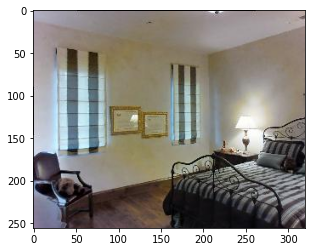

In [49]:
plt.imshow(camera_view.rgb)

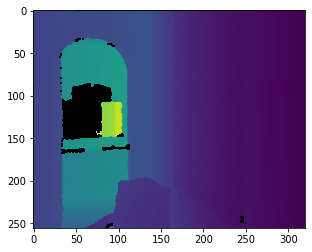

In [154]:
cmap = copy.copy(matplotlib.cm.get_cmap('viridis'))
cmap.set_bad(color='black')
depth_image = np.array(camera_view.depth.copy(), dtype=np.float_)
depth_image[depth_image == 0.] = np.nan
plt.imshow(depth_image, cmap=cmap)

In [ ]:
FACTOR = 1

depth_image_orig = imageio.imread('/home/artemov/data/spsg/matterport_original_data/QUCTc6BB5sX/QUCTc6BB5sX/undistorted_depth_images/4aab0b4dda514c84bce5491132392d73_d1_4.png')
rgb_image_orig = imageio.imread('/home/artemov/data/spsg/matterport_original_data/QUCTc6BB5sX/QUCTc6BB5sX/undistorted_color_images/4aab0b4dda514c84bce5491132392d73_i1_4.jpg')
# depth_image_orig = imageio.imread('/home/artemov/data/spsg/matterport_original_data/QUCTc6BB5sX/QUCTc6BB5sX/matterport_depth_images/4aab0b4dda514c84bce5491132392d73_d1_0.png')
depth_image_orig = depth_image_orig / 4

# depth_image_orig = resize(
#     depth_image_orig, 
#     (int(depth_image_orig.shape[0] / FACTOR), int(depth_image_orig.shape[1] / FACTOR)), 
#      anti_aliasing=False) 
# depth_image_orig = depth_image_orig.astype(np.uint16)
# cmap = copy.copy(matplotlib.cm.get_cmap('viridis'))
# plt.imshow(np.abs(depth_image_orig.astype(np.float_) - camera_view.depth.astype(np.float_)), cmap=cmap, vmin=0.0, vmax=10.)
# _=plt.hist((depth_image_orig.astype(np.float_) - camera_view.depth.astype(np.float_)).ravel(), bins=100, range=[-100, 100])
# plt.yscale('log')


In [32]:
def unproject_rgbd(camera_view):
    """Given a camera view with depth, rgb, intrinsics, and extrinsics, 
    compute a camera view with point cloud defined in global frame, 
    rgb, intrinsics, and extrinsics."""
    pixels = camera_view.depth
    height, width = pixels.shape
    i, j = np.meshgrid(np.arange(width), np.arange(height))
    image_integers = np.stack((
        i.ravel(),
        j.ravel(),
        np.ones_like(i).ravel()
    )).T  # [n, 3]
    image_integers = image_integers.astype(np.float32)
    depth_integers = pixels.ravel()
    image_integers = image_integers[depth_integers != 0]
    colors = camera_view.rgb.reshape((-1, 3))[depth_integers != 0]
    depth = depth_integers[depth_integers != 0].astype(np.float32) / 1000
    unprojected_depth = tt.transform_points(
        image_integers,
        np.linalg.inv(camera_view.intrinsics))
    unprojected_depth *= np.atleast_2d(depth).T
    unprojected_pc = CameraPose(camera_view.extrinsics).camera_to_world(unprojected_depth)

    from copy import deepcopy
    output_view = deepcopy(camera_view)
    output_view.rgb = colors
    output_view.depth = unprojected_pc
    return output_view

In [159]:
output_view = unproject_rgbd(camera_view)

In [166]:
camera_view.line_length = 4
    
_ = display_3d(
#     room.full_volume,
#     chunk_volume,
    PointsPlottable(
        output_view.depth, point_size=0.02, point_shader='3d', 
        point_colors=rgb_to_packed_colors(output_view.rgb[:,0], output_view.rgb[:,1], output_view.rgb[:,2]),
    ),
#     PointsPlottable(unprojected, point_size=0.02, point_shader='3d'),
     camera_view,
    height=1024
)

Output()

In [28]:
def project_rgbd(camera_view, points, colors):
    """Given a scene with 3D points and RGB colors, and 
    a camera view with depth, rgb, intrinsics, and extrinsics, 
    compute an output camera view with depth, rgb, intrinsics, and extrinsics, 
    by projecting the 3D points to camera frame."""
    unprojected_pc = CameraPose(camera_view.extrinsics).world_to_camera(points)
    depth = unprojected_pc[:, 2].copy()
    unprojected_pc /= np.atleast_2d(depth).T
    uv = tt.transform_points(unprojected_pc, camera_view.intrinsics)
    height, width = camera_view.depth.shape
    mask = (uv[:, 0] > 0) & (uv[:, 0] < width) \
         & (uv[:, 1] > 0) & (uv[:, 1] < height) \
         & (depth > 1e-2)
    uv_int = np.floor(uv[mask]).astype(np.int_)
    out_depth = np.zeros_like(camera_view.depth, dtype=np.float32)
    out_depth[uv_int[:, 1], uv_int[:, 0]] = depth[mask]
    out_color = np.zeros_like(camera_view.rgb, dtype=np.int_)
    out_color[uv_int[:, 1], uv_int[:, 0]] = colors[mask]
    
    from copy import deepcopy
    output_view = deepcopy(camera_view)
    output_view.rgb = out_color
    output_view.depth = out_depth
    return output_view

In [29]:
rendered_view = project_rgbd(camera_view, full_volume.voxels_xyz, full_volume.colors)

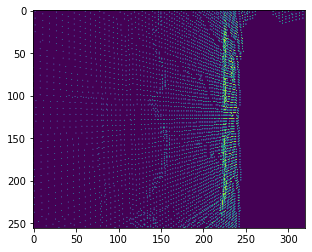

In [30]:
plt.imshow(rendered_view.depth)

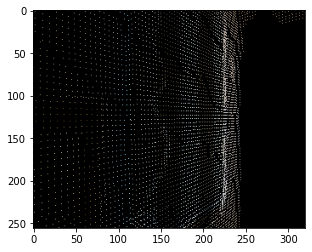

In [31]:
plt.imshow(rendered_view.rgb)

In [ ]:
compute_fraction_voxels_in_view

In [ ]:
paths = VoxelDataPaths(
    data_root='/home/artemov/data/spsg/',
    scene_id='QUCTc6BB5sX',
    room_id='9',
    type_id='cmp',
    chunk_id='*',
    fraction=0.6,
    verbose=True)
paths.load()

In [ ]:
computed_correspondences = np.loadtxt(
    '/home/artemov/data/spsg/computed-correspondences/QUCTc6BB5sX_room9__cmp__20.txt')
camera_ids = computed_correspondences[:, 0].astype(np.int_)
overlap = computed_correspondences[:, 1].astype(np.float_)

# with open('/home/artemov/data/spsg/computed-correspondences/QUCTc6BB5sX_room9__cmp__20.txt') as f:
#     for line in f:
#         camera_id, intersection = line.strip().split()
#         computed_correspondences[camera_id] = float(intersection)

In [ ]:
for idx in np.where(overlap>0.1)[0]:
    print(camera_ids[idx], overlap[idx])

In [ ]:
_=plt.hist(chunk.sdf.ravel(), range=[-4, 4], bins=100)

In [ ]:
full_volume = paths10._data.full_volume
full_volume.plot_type = 'points'
full_volume.plot_sdf_thr = 2.0
full_volume.plot_colors = False

full_volume = paths.full_volume
full_volume.plot_type = 'points'
full_volume.plot_sdf_thr = 2.0
full_volume.plot_colors = False

for chunk_volume in paths.chunk_volumes:
    chunk_volume.plot_type = 'points'
    chunk_volume.plot_sdf_thr = 0.5
    
for view in paths.camera_views.values():
    view.plot_type = 'frustum'
    view.line_length = 0.01
    view.line_width = 0.05
    view.opacity = 0.2

In [ ]:
chunk = next(chunk for chunk in paths._data.chunk_volumes if chunk.id == '20')
camera_view = paths.camera_views[str(524)]

In [ ]:
plt.imshow(camera_view.rgb)

In [ ]:
 _ = display_3d(
    paths._data.full_volume,
     paths10._data.full_volume,
#     chunk,
#     camera_view,
#      *(paths.camera_views[str(view_id)] for view_id in camera_ids[overlap>0.1]),
#     paths.camera_views['851'],
#     paths.camera_views['1859'],
#     paths.camera_views['187'],
#     paths.camera_views['524'],
#     paths.camera_views['2562'],
    height=1024
)

In [ ]:
# CameraFrustumPlottable(
#     camera_pose=CameraPose(paths.camera_views[537].extrinsics),
#     focal_length=paths.camera_views[537].intrinsics[0, 0],
#     image_size=np.array([320, 256]),
#     principal_point=paths.camera_views[537].intrinsics[[0, 1], 2],
#     sensor_size=np.array([0.001, 0.00075])
# )

In [ ]:
chunk_volume = chunk
camera_view = camera_view
frame_size = None

points = chunk_volume.voxels_xyz  # generate points based on chunk_volume
projected = tt.transform_points(
    CameraPose(camera_view.extrinsics).world_to_camera(points),
    camera_view.intrinsics)

In [ ]:
full_points = full_volume.voxels_xyz
full_projected = tt.transform_points(
    CameraPose(camera_view.extrinsics).world_to_camera(full_points),
    camera_view.intrinsics)


In [ ]:
full_projected.shape, projected.shape

In [ ]:
if None is not frame_size:
    width, height = frame_size
else:
    width = 2 * camera_view.intrinsics[0, 2]
    height = 2 * camera_view.intrinsics[1, 2]
mask = (projected[:, 0] > 0) & (projected[:, 0] < width) \
       & (projected[:, 1] > 0) & (projected[:, 1] < height) \
       & (projected[:, 2] > 0)

In [ ]:
depth = np.concatenate((full_projected, projected[mask]))

In [ ]:
from scipy.spatial import cKDTree

In [ ]:
n_neighbours=64
n_jobs=4
vis_type='mean'

# take UV coordinates of the pixel in the image space
uv, z = depth[:, :2], depth[:, 2]
# index for fast neighbour queries
kdt = cKDTree(uv)
distances, indexes = kdt.query(
    uv,
    k=n_neighbours + 1,
    n_jobs=n_jobs)

# take groups of points around each query point
z_nbr = z[indexes[:, 1:]]
# min/max depth of points in each group
z_min = np.min(z_nbr, axis=1)
z_max = np.max(z_nbr, axis=1)
# depth of the query point
z_point = z[indexes[:, 0]]
# compute continuous visibility scores;
# score -> 0 (very large d_p) means background/invisible,
# score -> 1 (small d_p) means foreground/visible
visible_score = np.exp(-(z_point - z_min) ** 2 / (z_max - z_min) ** 2)
if 'mean' == vis_type:
    thr = np.mean(visible_score)
else:
    assert isinstance(vis_type, float)
    thr = vis_type
visibility_mask = (visible_score > thr).astype(bool)

In [ ]:
visibility_mask.shape, len(full_projected) + len(projected[mask])

In [ ]:
len(chunk.voxels_xyz[mask][visibility_mask[-len(projected[mask]):]]) / len(chunk.voxels_xyz)

In [ ]:
 _ = display_3d(
     chunk,
    PointsPlottable(
        points=chunk.voxels_xyz[mask][visibility_mask[-len(projected[mask]):]],
        point_size=0.02,
    ),
    camera_view,
    height=1024
)

In [ ]:
paths.camera_views.keys()

In [ ]:
paths.camera_views[537].rgb.shape

In [ ]:
view = paths.camera_views[3273]
plt.imshow(view.rgb)

In [ ]:
frustum = CameraFrustum(view.extrinsics, [view.intrinsics, view.intrinsics])
points = paths.full_volume.voxels_xyz
mask = frustum.is_visible(points)

In [ ]:
projected_points = tt.transform_points(
    CameraPose(view.extrinsics).world_to_camera(points), 
    view.intrinsics)

In [ ]:
view.intrinsics

In [ ]:
mask = (projected_points[:, 0] > 0) & (projected_points[:, 0] < 320) \
    & (projected_points[:, 1] > 0) & (projected_points[:, 1] < 256) \
    & (projected_points[:, 2] > 0)

In [ ]:
points[mask].shape

In [ ]:
 _ = display_3d(
    PointsPlottable(points, point_size=0.02),
     PointsPlottable(
         points[mask], 
         point_size=0.02,
         point_color=0xff0000),
    CameraFrustumPlottable(
        camera_pose=CameraPose(paths.camera_views[3273].extrinsics),
        focal_length=[paths.camera_views[3273].intrinsics[0, 0]],
        image_size=np.array([320, 256]),
        principal_point=paths.camera_views[3273].intrinsics[[0, 1], 2],
        sensor_size=np.array([320, 256]),
        line_length=0.01,
    ),
    height=1024
)

In [ ]:
 _ = display_3d(
    paths._data,
#     full_volume,
#     chunk_volume,
#     view,
    CameraFrustumPlottable(
        camera_pose=CameraPose(paths.camera_views[3273].extrinsics),
        focal_length=[paths.camera_views[3273].intrinsics[0, 0]],
        image_size=np.array([320, 256]),
        principal_point=paths.camera_views[3273].intrinsics[[0, 1], 2],
        sensor_size=np.array([320, 256]),
        line_length=0.01,
    ),
    height=1024
)

In [ ]:
paths.chunk_volumes[0].id

In [ ]:
_ = display_3d(
    VolumePlottable(
    sdf < 0.1)
)

In [ ]:
[view.extrinsics for view in paths.camera_views]

In [ ]:
_ = display_3d(
    PointsPlottable(
        points=tt.transform_points(
            full_volume.room_locs[room_mask], full_volume.room_transform),
        point_colors=rgb_to_packed_colors(colors[room_mask, 0], colors[room_mask, 1], colors[room_mask, 2]),
        point_size=100.0,),
    *[CameraPlottable(
        CameraPose(view.extrinsics),
        line_length=1000.0,
        line_width=10.0) for view in paths.camera_views],
    height=1024,
)

In [ ]:
tt.transform_points(
            full_volume.room_locs[room_mask], full_volume.room_transform)

In [ ]:
_ = display_3d(
    full_volume
)

In [ ]:
from contrib.plotting import *
from contrib.sdf_reader import load_sdf

In [ ]:
@dataclass
class VolumePlottable(Plottable):
    volume: np.array
    color_map: str = 'jet'
    order: str = 'xyz'
    interpolation: bool = False
    model_matrix: np.array = None
    
    def plot(self, k3d_plot):
        if None is self.volume:
            return
        volume = self.volume if self.order == 'xyz' else np.transpose(self.volume, (2, 1, 0))
        args = dict(
            volume=volume,
            interpolation=self.interpolation,
            model_matrix=self.model_matrix
        )
        assert None is not self.color_map, 'colormap must be specified'
#         if isinstance(self.color_map, str):
#             self.color_map = getattr(k3d.colormaps.matplotlib_color_maps, self.color_map)
#         color_map = k3d.helpers.map_colors(
#             np.arange(0, 255), self.color_map, (0, 255)
#         ).astype(np.uint32)
#         args['color_map'] = self.color_map

        k3d_plot += k3d.volume(**args)


In [ ]:
from src.sdf_reader import load_sdf
sdf, sdf_transform, known, colors = load_sdf(
    file='/Users/artonson/tmp/spsg/data-geo-color/D7N2EKCX4Sj_room9__cmp__0.sdf',
    load_sparse=False,
    load_known=False,
    load_colors=True,
    color_file=None)
sdf[sdf==-np.inf] = np.inf

In [ ]:
from src.plotting import Plottable, VolumePlottable, PointsPlottable, \
    CameraPlottable, CameraFrustumPlottable

_ = display_3d(
    VolumePlottable(
        sdf < .01,
        color_map='jet_r',
    ),
    height=1024,
)

In [ ]:
(room_locs, room_sdf), room_shape, room_transform, room_known, room_colors = load_sdf(
    file='/Users/artonson/tmp/spsg/mp_sdf_2cm_input/D7N2EKCX4Sj_room9__0__.sdf',
    load_sparse=True, 
    load_known=False,
    load_colors=True, 
    color_file='/Users/artonson/tmp/spsg/mp_sdf_2cm_input/D7N2EKCX4Sj_room9__0__.colors')

In [ ]:
room = np.ones(room_shape, dtype=np.float32) * np.inf

In [ ]:
room[room_locs[:, 0], room_locs[:, 1], room_locs[:, 2]] = room_sdf

In [ ]:
import k3d
k3d.volume?

In [ ]:
_ = display_3d(
    VolumePlottable(
        room < .01,
        color_map='jet_r',
        interpolation=False,
        model_matrix=room_transform,
    ),
#     VolumePlottable(
#         sdf < .01,
#         color_map='jet',
#         interpolation=False,
#         model_matrix=sdf_transform,
#     ),
    height=1024,
)

In [ ]:
import glob

from PIL import Image as PilImage

In [ ]:
df_indexes_by_slice = {}
for filename in glob.glob('/Users/artonson/tmp/spsg/data-frames/D7N2EKCX4Sj_room9__cmp__*.txt'):
    scene_room, dtype, s = os.path.basename(filename).split('__')
    s = int(os.path.splitext(s)[0])
    df_indexes = np.loadtxt(filename, dtype=np.int_)
    df_indexes_by_slice[s] = df_indexes

In [ ]:
camera_params = np.loadtxt('/Users/artonson/tmp/spsg/images/D7N2EKCX4Sj/camera/0.txt')
extrinsics, intrinsics = camera_params[:4], camera_params[4:]

image = PilImage.open('/Users/artonson/tmp/spsg/images/D7N2EKCX4Sj/color/1.jpg')
image_array = np.asarray(image)

In [ ]:
image = PilImage.open('/Users/artonson/tmp/spsg/images/D7N2EKCX4Sj/depth/1.png')
image_array = np.asarray(image, dtype=np.float_)

In [ ]:
image_to_display = image_array.copy()
background_idx = image_to_display == 0.
image_to_display[background_idx] = np.nan

plt.imshow(image_to_display)